# Exercício 1 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation   import calculateNegentropy, kde_entropy, KLdivergence, resultsTable
from evaluation   import plot_MutualInformation, graph_fittedData, make_pdf, KLmatrix, MImatrix
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9484767913818359, 3.329135199778388e-18)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FirstMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
distDataFrame.T.head()

,0,1,2
0,-1.671230,1.624275,0.141849
1,-1.678474,2.195991,-0.200141
2,-1.591576,0.778850,0.746083
3,1.998872,-1.635852,-0.631749
4,-1.557389,1.213509,0.352850


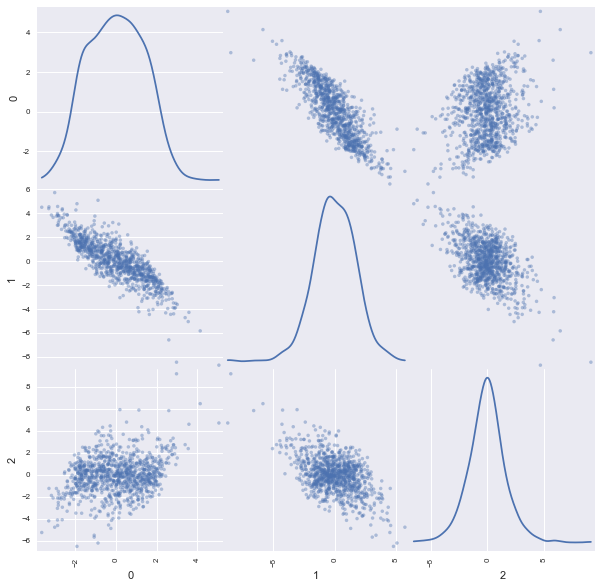

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.0531,0.9908,6.6714e-06
1,0.2735,0.17,0.9895,1.4087e-06
2,0.4642,0.4804,0.9809,3.5273e-10


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 1)

Execution time: 0.10701322555541992 seconds


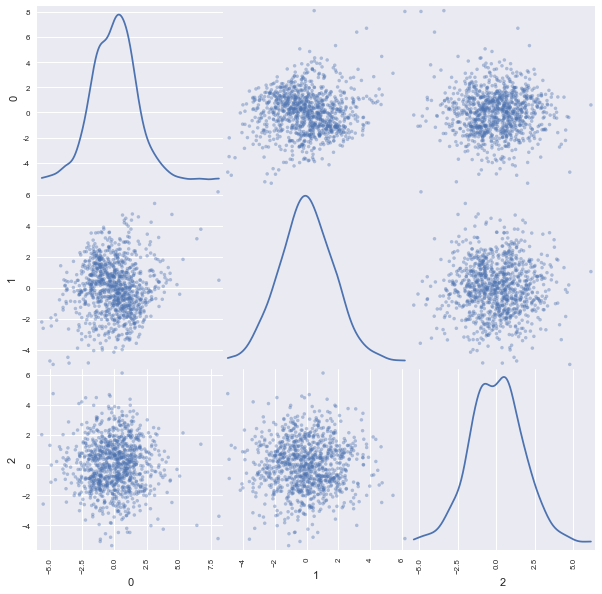

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1961,0.2033,0.9883,3.7611e-07
1,0.0694,0.2049,0.9989,0.79804
2,0,0.0384,0.9985,0.57446


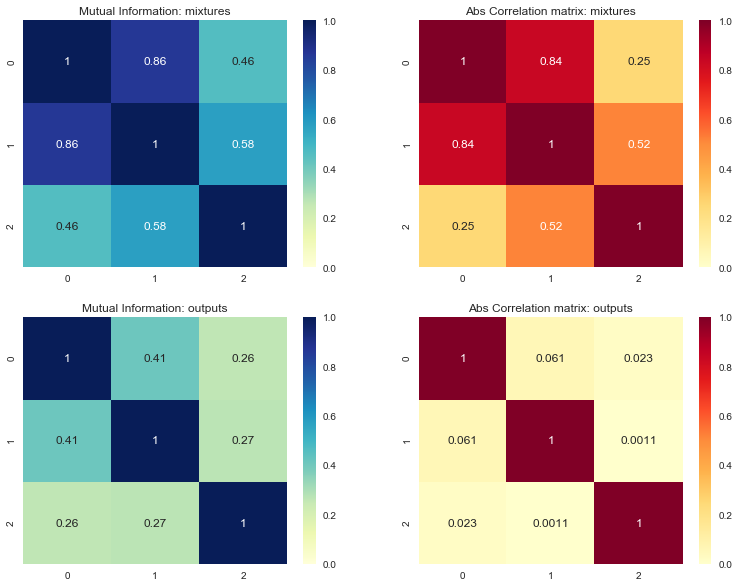

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-2, decayRate = 1e-5, runs  = 1) 

Execution time: 0.1120140552520752 seconds


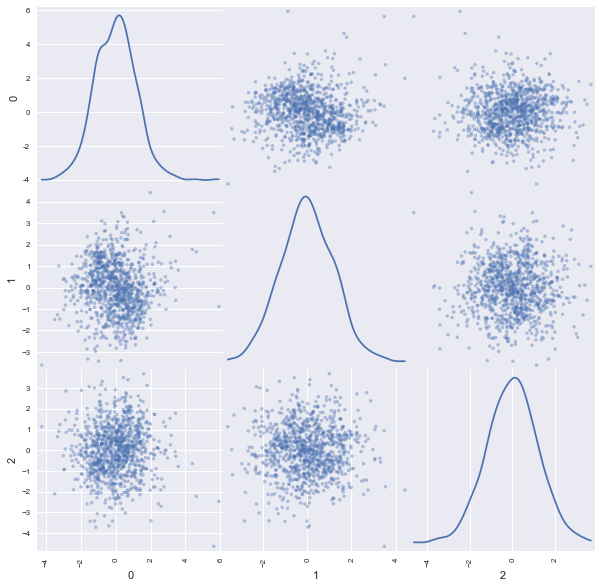

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3118,0.1365,0.9897,1.816e-06
1,0,0.0547,0.9987,0.69424
2,0.019,0.1106,0.9987,0.67996


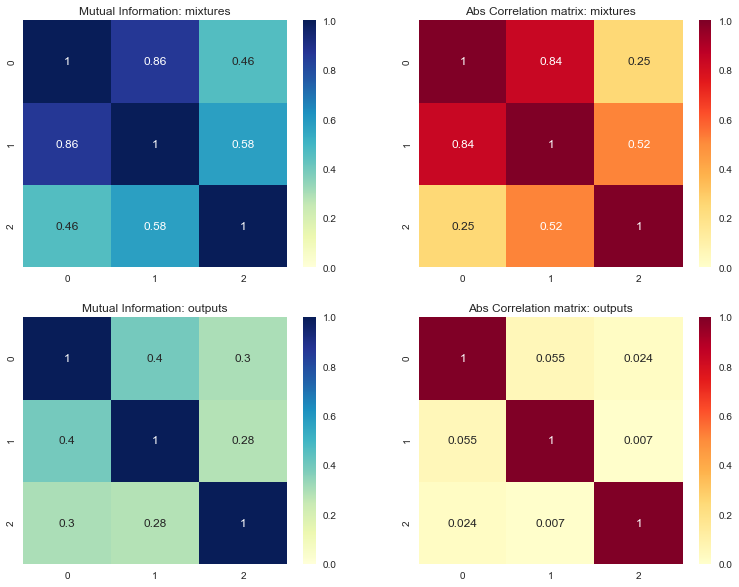

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-8, runs = 20)

Execution time: 1.4411814212799072 seconds


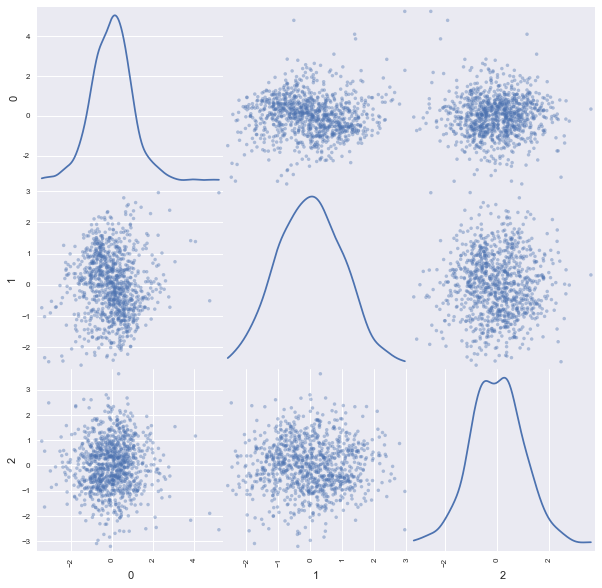

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2715,0.7186,0.9831,2.3102e-09
1,0,0.0374,0.9974,0.10676
2,0,0.4468,0.9986,0.60103


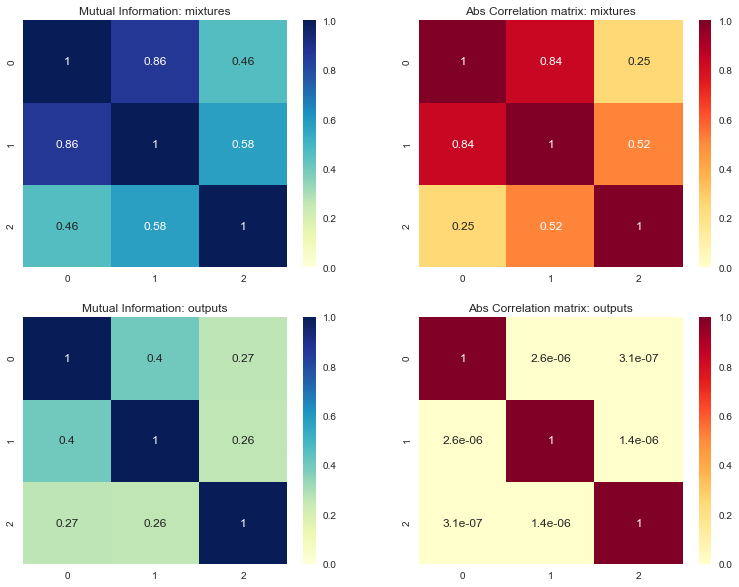

In [14]:
a = resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

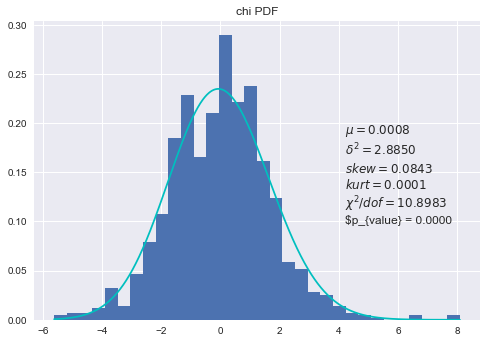

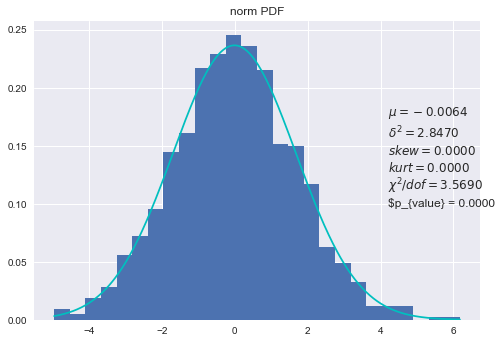

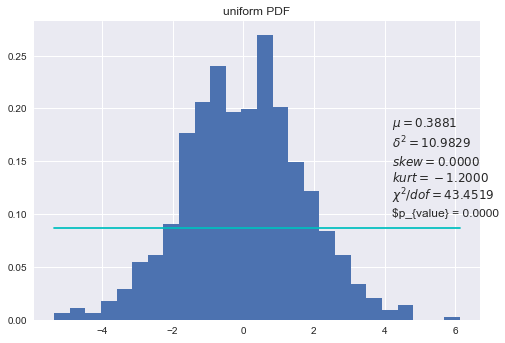

In [15]:
graph_fittedData(yNPCA[0])
graph_fittedData(yNPCA[1])
graph_fittedData(yNPCA[2])

## Chichocki-Unbehauen Algorithm Feedback network

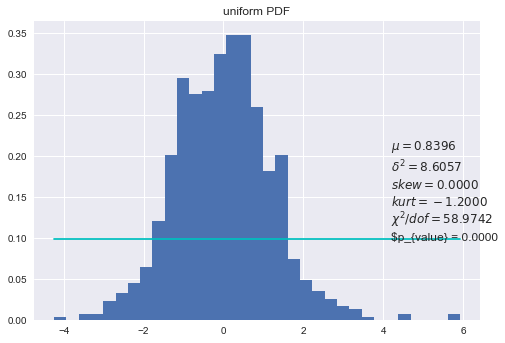

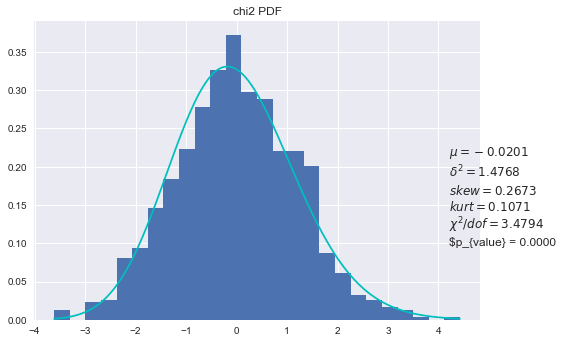

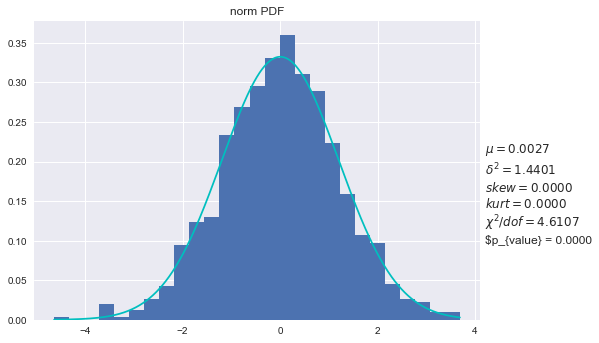

In [16]:
graph_fittedData(yFeedback[0])
graph_fittedData(yFeedback[1])
graph_fittedData(yFeedback[2])

## Chichocki-Unbehauen Algorithm Feedforward network

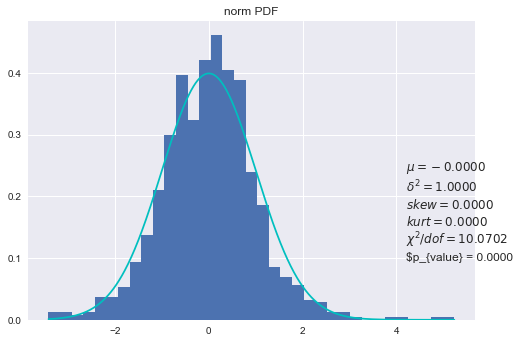

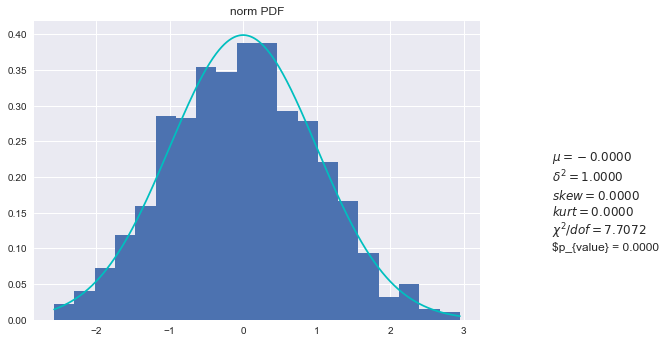

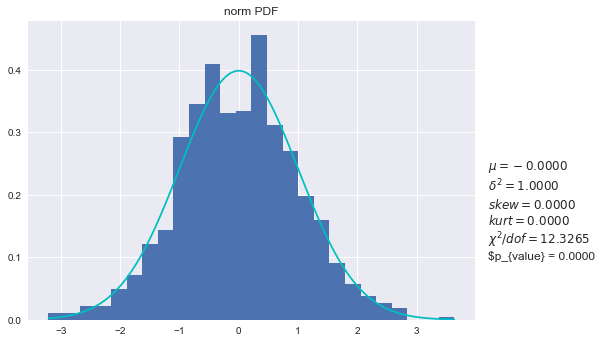

In [17]:
graph_fittedData(yFeedforward[0])
graph_fittedData(yFeedforward[1])
graph_fittedData(yFeedforward[2])

# Fontes conhecidas

In [18]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/FirstSource1000Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(3, 1000)


,0,1,2
0,-1.671230,1.624275,0.141849
1,-1.678474,2.195991,-0.200141
2,-1.591576,0.778850,0.746083
3,1.998872,-1.635852,-0.631749
4,-1.557389,1.213509,0.352850


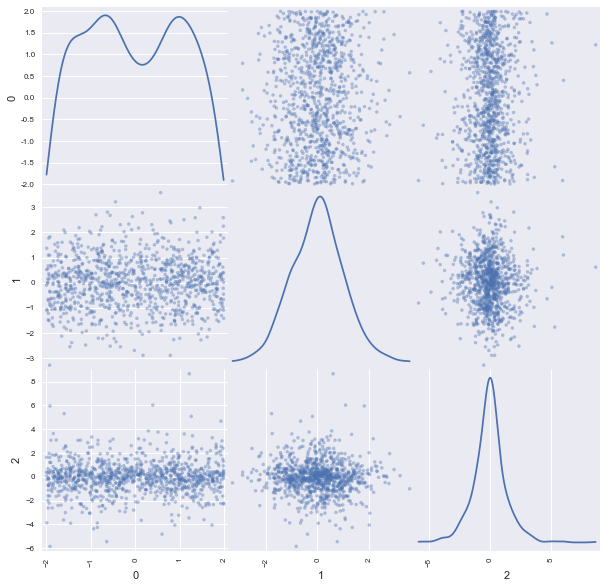

In [24]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(3, 1000) (3, 1000)
[[ 1.17450455  0.7670547   0.88342733]
 [ 0.31517659  0.09032796  0.08774543]
 [ 0.18609511  0.28410044  0.32418262]]


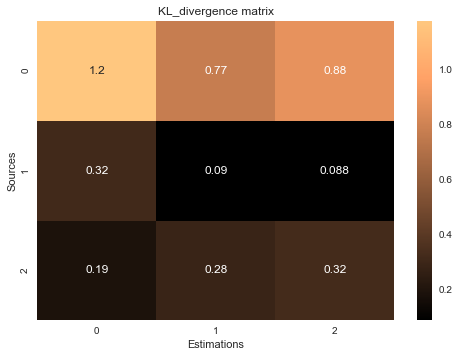

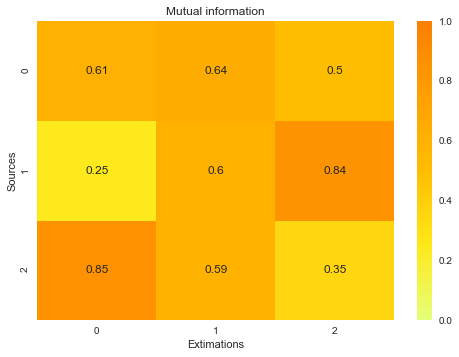

In [20]:
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(3, 1000) (3, 1000)
[[ 1.27499762  0.87351361  0.92037833]
 [ 0.448004    0.11059036  0.29334633]
 [ 0.19023961  0.30596824  0.91555726]]


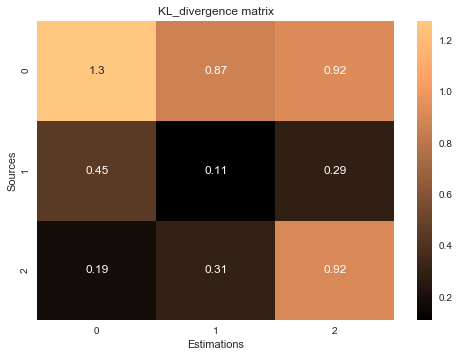

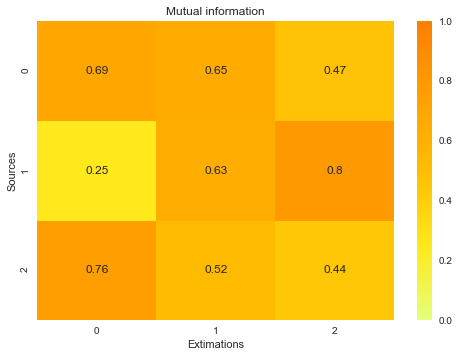

In [21]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(3, 1000) (3, 1000)
[[ 1.3661269   0.4495665   0.88108544]
 [ 0.56920611  0.0603462   0.08369133]
 [ 0.13784414  0.45381089  0.32292227]]


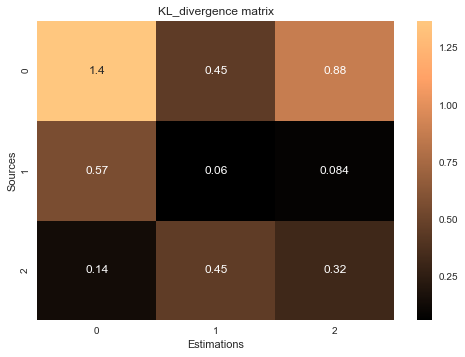

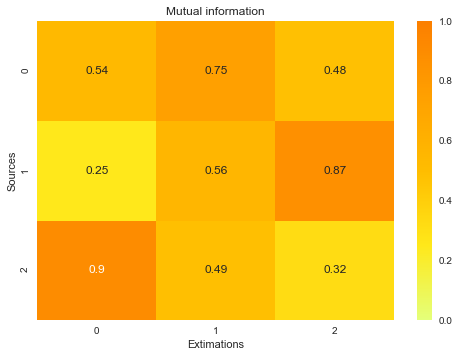

In [22]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)